### **load libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

### **load Data**

In [5]:
df = pd.read_csv(r'/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65448,51589,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,...,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,0.76,0.0
65449,51589,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,...,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,42.90,0.0
65450,51590,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,...,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,1.98,0.0
65451,51591,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,...,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,113.65,0.0


### **Data exploration**

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65448,51589,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,...,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,0.76,0.0
65449,51589,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,...,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,42.90,0.0
65450,51590,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,...,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,1.98,0.0
65451,51591,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,...,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,113.65,0.0
65452,51591,1.251499,0.352835,-0.173985,1.057454,0.345146,-0.366959,0.446715,-0.292922,-0.083856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.sample(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5335,5250,1.125732,0.580033,0.762026,2.442682,0.211094,0.482414,-0.197910,0.160584,0.397897,...,-0.349087,-0.865218,0.141430,-0.431879,0.146214,-0.270187,-0.025082,0.004080,2.71,0.0
20087,30775,1.161777,0.211076,0.006083,0.570806,-0.159866,-1.208446,0.574393,-0.395971,-0.345747,...,-0.334056,-1.093615,0.079628,0.416219,0.296511,0.127883,-0.069441,0.022742,69.95,0.0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,...,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000
mean,33429.846867,-0.240575,-0.012987,0.684068,0.171729,-0.266835,0.103221,-0.113163,0.059434,0.037196,...,-0.028511,-0.106841,-0.039098,0.005598,0.136732,0.019958,0.002181,0.004243,96.276149,0.002582
std,14078.168886,1.857128,1.649806,1.426716,1.378742,1.388857,1.306443,1.254939,1.223332,1.170955,...,0.729616,0.637402,0.603012,0.596708,0.439030,0.497424,0.381480,0.322063,270.242777,0.050749
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,27748.000000,-1.000865,-0.585921,0.197913,-0.723647,-0.884703,-0.636487,-0.602981,-0.142531,-0.662885,...,-0.226897,-0.526780,-0.179573,-0.326243,-0.127572,-0.329428,-0.062871,-0.005887,7.680000,0.000000
50%,36941.000000,-0.243460,0.075028,0.774169,0.189237,-0.298678,-0.148843,-0.073032,0.065169,-0.057666,...,-0.062061,-0.081680,-0.051837,0.061257,0.174456,-0.076200,0.009404,0.022739,26.220000,0.000000
75%,43906.000000,1.153819,0.730504,1.408066,1.054661,0.272863,0.495135,0.422151,0.342671,0.695866,...,0.114460,0.308386,0.078933,0.402812,0.423146,0.296759,0.082485,0.076182,88.122500,0.000000
max,51591.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

In [11]:
df.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [12]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [14]:
d = df.isnull().sum()
d[d>0]

,0
V11,1
V12,1
V13,1
V14,1
V15,1
V16,1
V17,1
V18,1
V19,1
V20,1


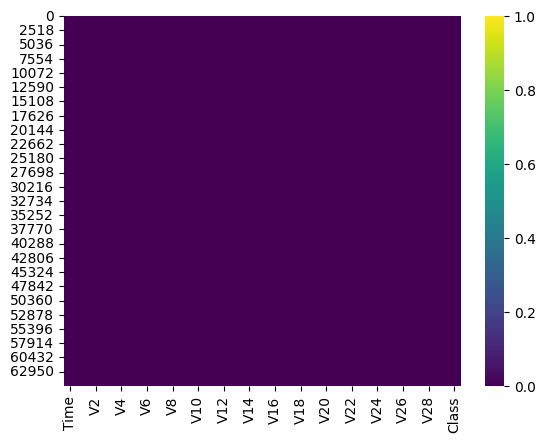

In [15]:
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

### **Cleaning Now**

In [16]:
df.dropna(inplace = True)

In [17]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [18]:
d = df.isnull().sum()
d[d > 0]

,0


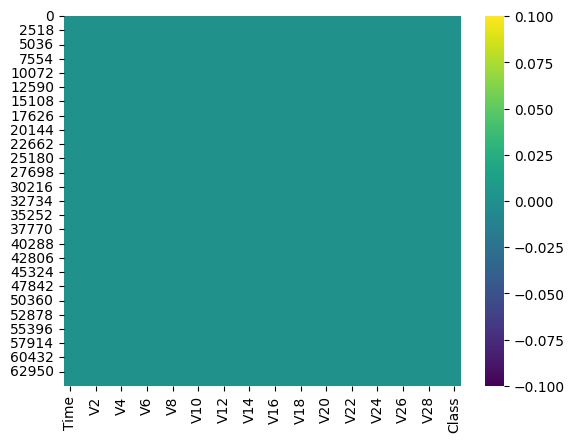

In [19]:
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [20]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
65447,False
65448,False
65449,False
65450,False


In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df.duplicated().sum()

np.int64(0)

### **Data analysis**

In [23]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.002708,-0.090629,-0.051501,-0.033266,-0.061704,-0.003029,-0.000836,0.033872,-0.323126,...,0.015369,0.032622,-0.000574,-0.011794,0.028377,-0.020737,-0.021881,0.000343,0.062702,-0.014268
V1,-0.002708,1.000000,0.006249,0.263816,-0.084071,0.051071,0.089126,0.121995,-0.060780,-0.031263,...,-0.035065,-0.038557,-0.075158,-0.007921,0.188486,0.021839,-0.050921,0.088079,-0.255957,-0.189162
V2,-0.090629,0.006249,1.000000,-0.140660,0.077991,-0.072276,0.001076,-0.057476,0.058168,-0.017458,...,-0.033999,-0.025136,0.009023,-0.020420,-0.083298,-0.026180,0.047167,-0.058200,-0.566425,0.158834
V3,-0.051501,0.263816,-0.140660,1.000000,-0.119103,0.263218,-0.033243,0.273768,-0.217408,0.153034,...,0.012086,0.238951,0.052846,0.021959,-0.182954,0.048240,-0.099493,0.025781,-0.215744,-0.366472
V4,-0.033266,-0.084071,0.077991,-0.119103,1.000000,-0.030573,-0.049874,-0.061273,0.074499,0.020495,...,0.022535,0.017239,-0.015028,-0.003532,-0.007492,-0.001149,0.048333,0.009373,0.097416,0.195947
V5,-0.061704,0.051071,-0.072276,0.263218,-0.030573,1.000000,0.058545,0.006075,-0.072805,0.062094,...,-0.066072,-0.065905,0.017205,-0.015358,-0.017431,-0.040689,-0.048802,0.022246,-0.388602,-0.183503
V6,-0.003029,0.089126,0.001076,-0.033243,-0.049874,0.058545,1.000000,0.093493,-0.052582,0.046095,...,0.020752,0.032966,-0.015845,0.005281,0.049194,0.011096,-0.014502,-0.031851,0.206683,-0.088695
V7,-0.000836,0.121995,-0.057476,0.273768,-0.061273,0.006075,0.093493,1.000000,-0.092279,0.061924,...,0.013329,-0.040017,0.074564,-0.000558,-0.105406,-0.039380,-0.121837,-0.043887,0.376036,-0.296605
V8,0.033872,-0.060780,0.058168,-0.217408,0.074499,-0.072805,-0.052582,-0.092279,1.000000,-0.052445,...,0.046054,0.013603,-0.026613,0.009524,0.017396,0.003601,0.025816,0.036363,-0.092156,0.143906
V9,-0.323126,-0.031263,-0.017458,0.153034,0.020495,0.062094,0.046095,0.061924,-0.052445,1.000000,...,-0.015846,0.031308,-0.045139,0.011463,0.110379,0.104547,-0.020087,-0.015586,-0.022807,-0.145183


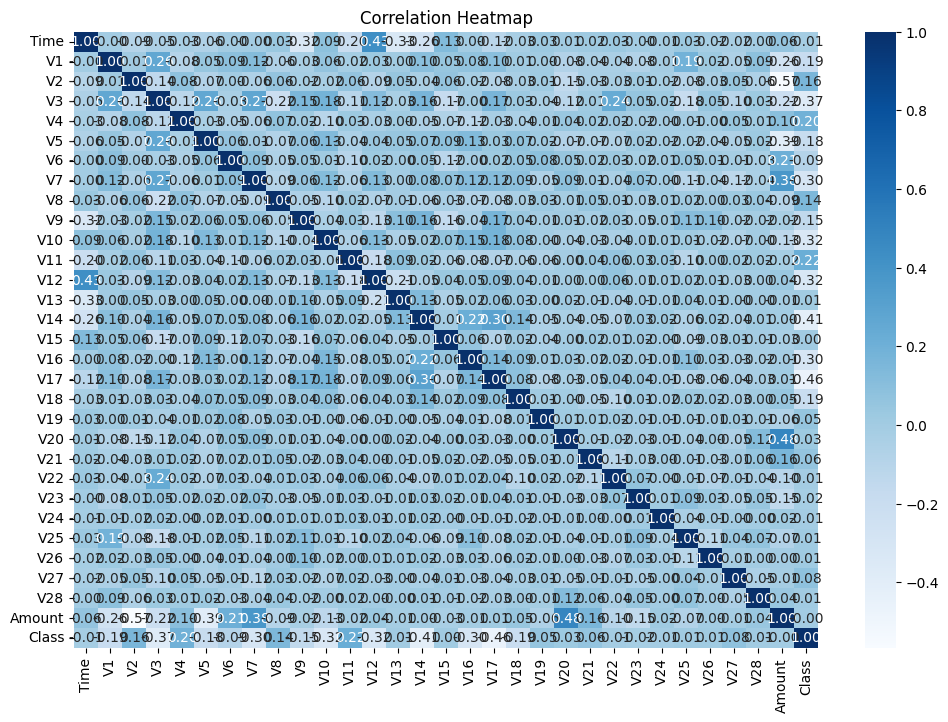

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

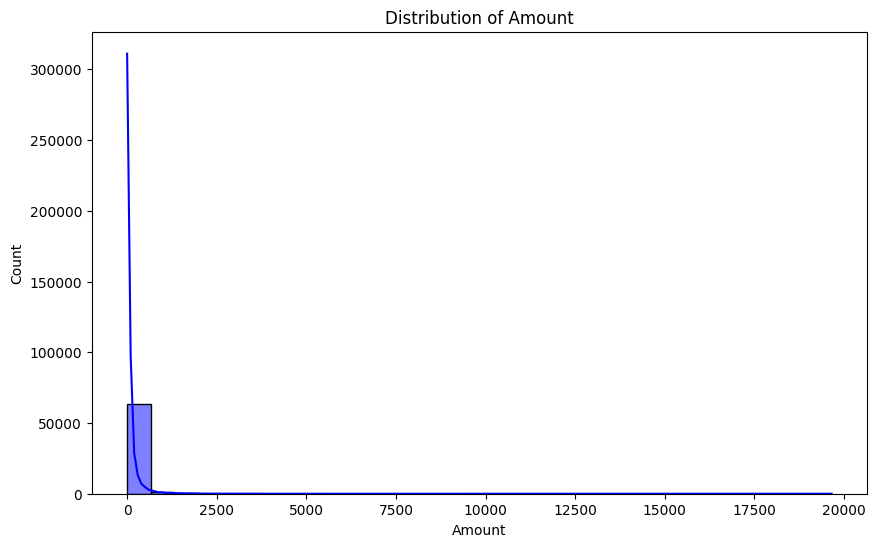

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True, color="blue")
plt.title('Distribution of Amount')
plt.show()

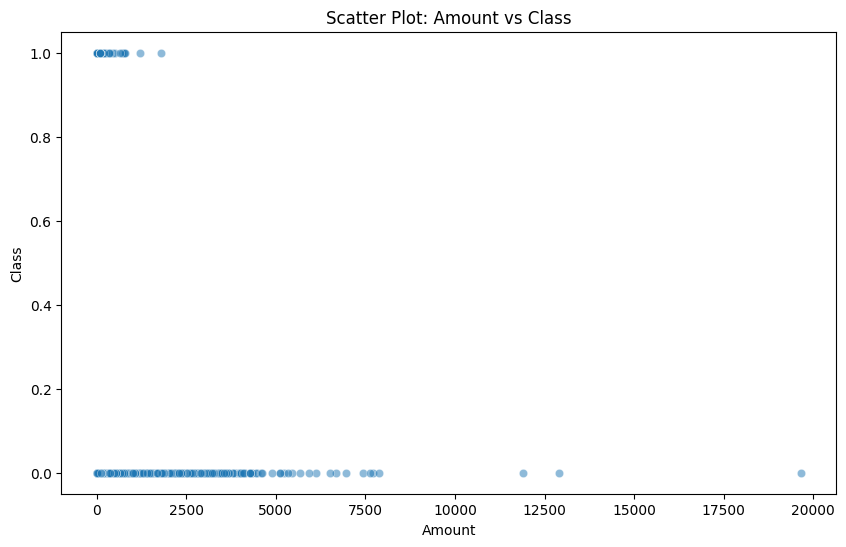

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Amount'], y=df['Class'], alpha=0.5)
plt.title('Scatter Plot: Amount vs Class')
plt.show()

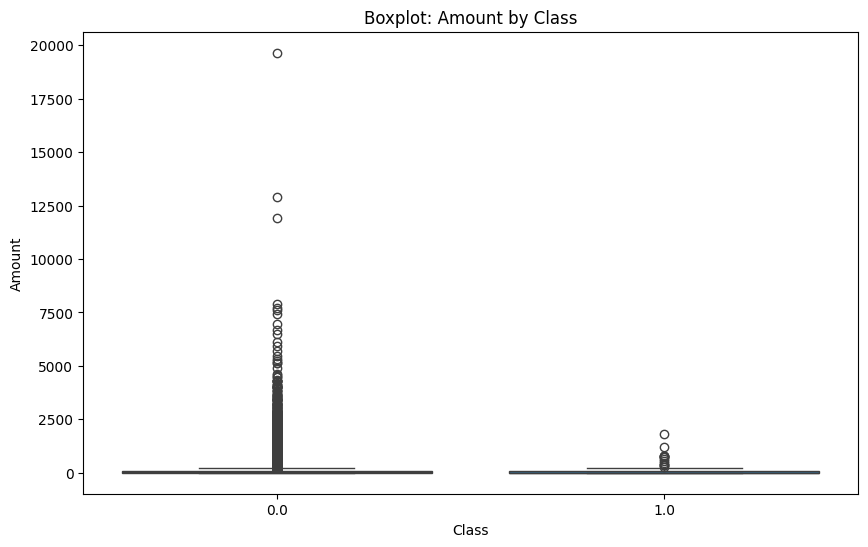

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Class'], y=df['Amount'])
plt.title('Boxplot: Amount by Class')
plt.show()

<ipython-input-29-8a24c1abdfdc>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Amount'], shade=True, color="green")


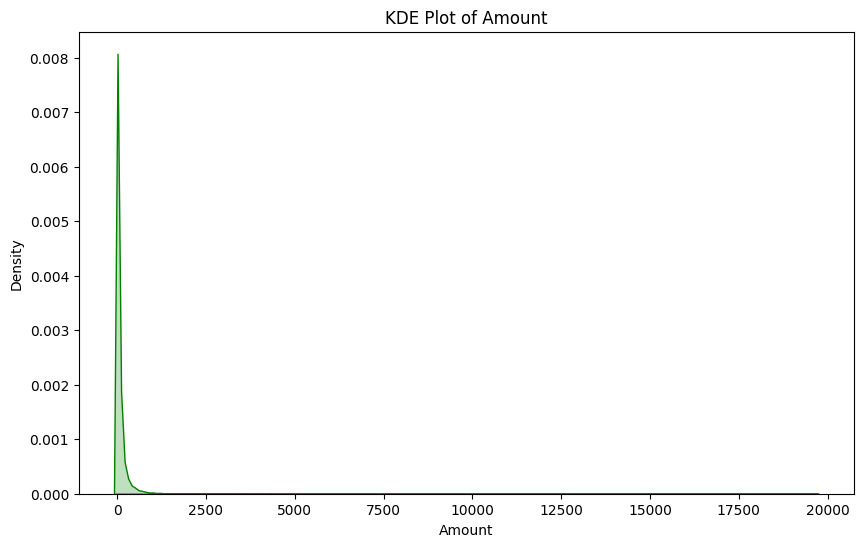

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Amount'], shade=True, color="green")
plt.title('KDE Plot of Amount')
plt.show()

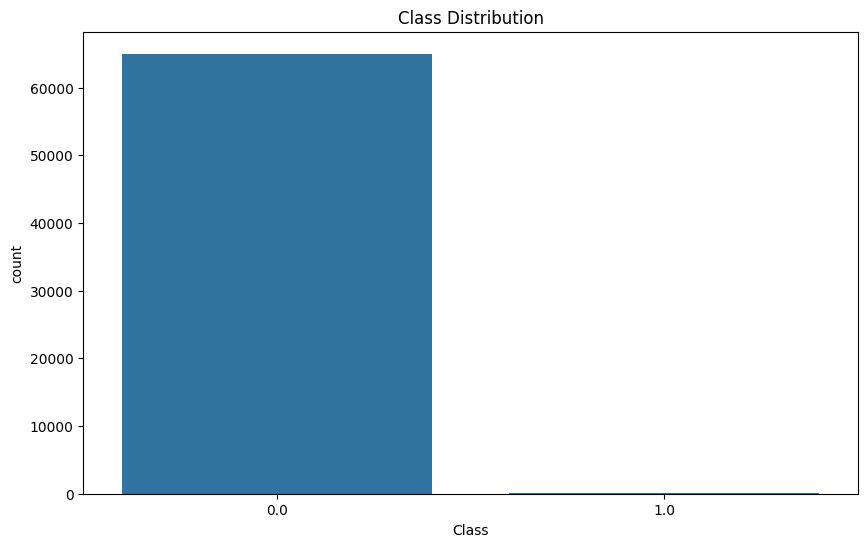

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [40]:
df['Class'].value_counts()

,count
Class,
0.0,65023
1.0,169


<Axes: ylabel='count'>

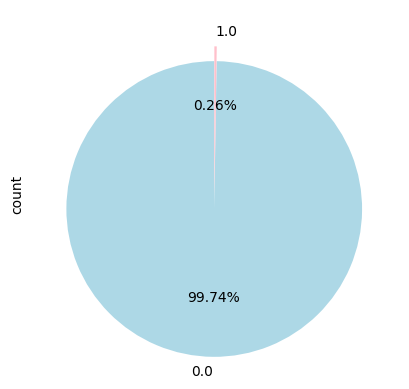

In [39]:
df['Class'].value_counts().plot.pie(autopct="%0.2f%%",
    colors=["lightblue", "pink"],
    startangle=90,
    explode=(0.1, 0)  )

In [46]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,
                shuffle= True)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

Before SMOTE:
Class
0.0    52020
1.0      133
Name: count, dtype: int64

After SMOTE:
Class
1.0    52020
0.0    52020
Name: count, dtype: int64


In [51]:
model = SVC()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
y_pred

array([0., 1., 1., ..., 0., 1., 0.])

In [52]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.8407853362987959
0.841370582708569


In [53]:
confusion_matrix(y_pred,y_test)

array([[10947,    20],
       [ 2056,    16]])

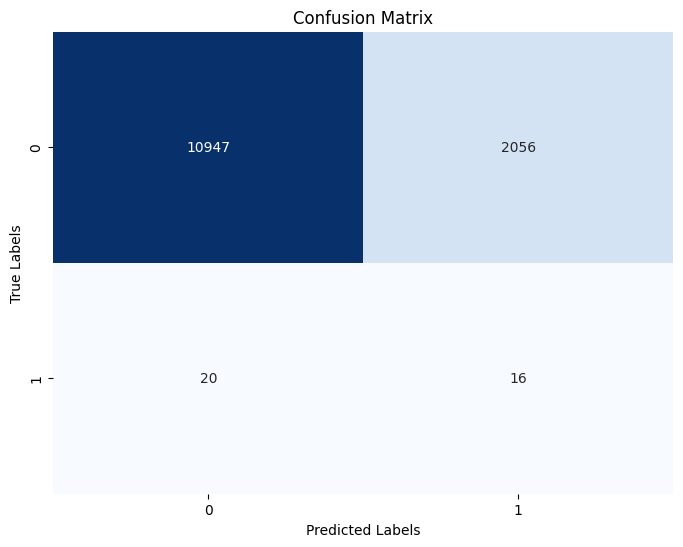

In [54]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [55]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.84      0.91     13003\n         1.0       0.01      0.44      0.02        36\n\n    accuracy                           0.84     13039\n   macro avg       0.50      0.64      0.46     13039\nweighted avg       1.00      0.84      0.91     13039\n'